In [93]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [94]:
os.chdir("/home/ubenz/Documents/project/bankgraph/")

In [95]:
df = pd.read_csv("data/BankChurners.csv.zip")

In [96]:
data = df.iloc[:,:10]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21


In [97]:
print(data.shape)
print(data.nunique())

(10127, 10)
CLIENTNUM          10127
Attrition_Flag         2
Customer_Age          45
Gender                 2
Dependent_count        6
Education_Level        7
Marital_Status         4
Income_Category        6
Card_Category          4
Months_on_book        44
dtype: int64


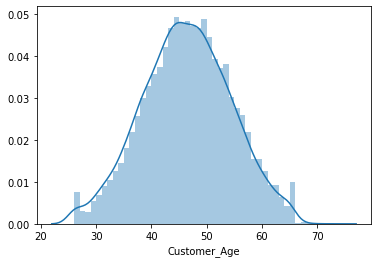

In [98]:
sns.distplot(data.Customer_Age)

In [99]:
data['Age_Bins'] = pd.cut(data['Customer_Age'], bins=[0, 18, 26, 45 ,float('Inf')], labels=['young', 'young_adult', 'adult', 'elders'])
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Age_Bins
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,adult
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,elders
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,elders
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,adult
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,adult


In [100]:
replace_sex = {'M' : "Male", 'F' : 'Female'}
data.replace({"Gender" : replace_sex}, inplace=True)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Age_Bins
0,768805383,Existing Customer,45,Male,3,High School,Married,$60K - $80K,Blue,39,adult
1,818770008,Existing Customer,49,Female,5,Graduate,Single,Less than $40K,Blue,44,elders
2,713982108,Existing Customer,51,Male,3,Graduate,Married,$80K - $120K,Blue,36,elders
3,769911858,Existing Customer,40,Female,4,High School,Unknown,Less than $40K,Blue,34,adult
4,709106358,Existing Customer,40,Male,3,Uneducated,Married,$60K - $80K,Blue,21,adult


array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

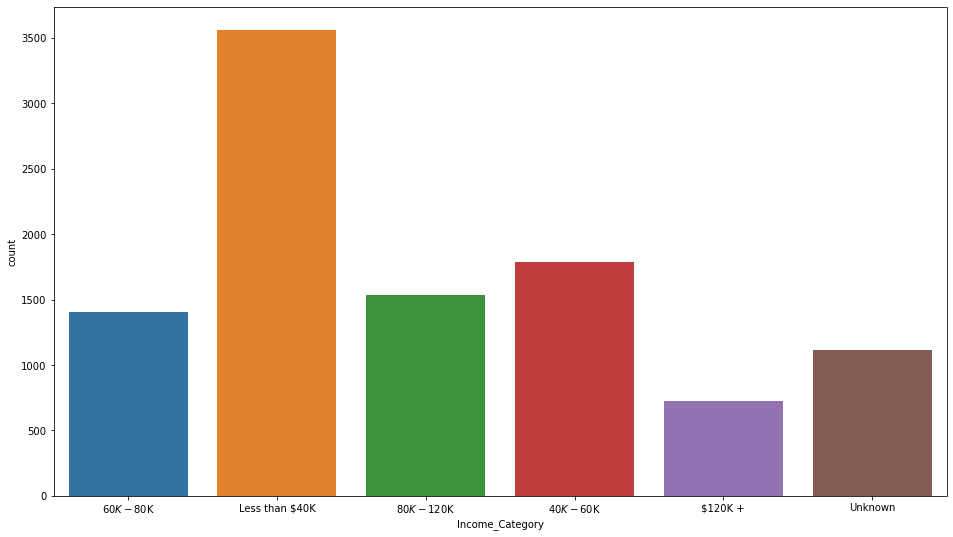

In [101]:
plt.figure(figsize=(16,9))
sns.countplot(data.Income_Category)
data.Income_Category.unique()

In [102]:
replace_income = {'Less than $40K': "Middle/Low Income",
               '$40K - $60K' : "Middle Income",
               '$60K - $80K': 'Middle/High Income',
               '$80K - $120K': 'High Income',
               '$120K +':'Very High Income'}
data["Income_Bins"] = data["Income_Category"].replace(replace_income)#, inplace=True)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Age_Bins,Income_Bins
0,768805383,Existing Customer,45,Male,3,High School,Married,$60K - $80K,Blue,39,adult,Middle/High Income
1,818770008,Existing Customer,49,Female,5,Graduate,Single,Less than $40K,Blue,44,elders,Middle/Low Income
2,713982108,Existing Customer,51,Male,3,Graduate,Married,$80K - $120K,Blue,36,elders,High Income
3,769911858,Existing Customer,40,Female,4,High School,Unknown,Less than $40K,Blue,34,adult,Middle/Low Income
4,709106358,Existing Customer,40,Male,3,Uneducated,Married,$60K - $80K,Blue,21,adult,Middle/High Income


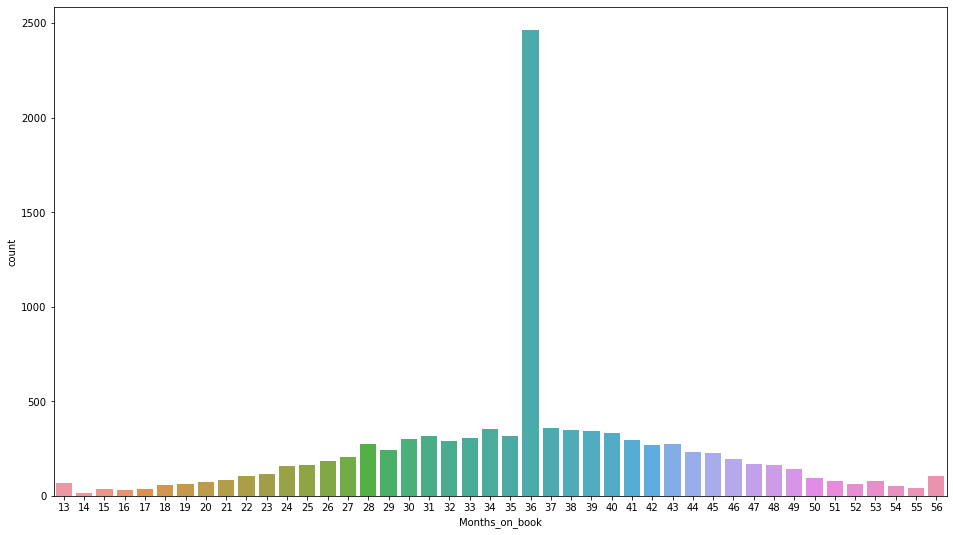

In [103]:
plt.figure(figsize=(16,9))
sns.countplot(data.Months_on_book)

In [104]:
data['Age_Relation'] = pd.cut(data['Months_on_book'], bins=[0, 24, 36, 48 ,float('Inf')], labels=['NewCustomer', 'RecentCustomer', 'OldCustomer', 'VeryOldCustomer'])
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Age_Bins,Income_Bins,Age_Relation
0,768805383,Existing Customer,45,Male,3,High School,Married,$60K - $80K,Blue,39,adult,Middle/High Income,OldCustomer
1,818770008,Existing Customer,49,Female,5,Graduate,Single,Less than $40K,Blue,44,elders,Middle/Low Income,OldCustomer
2,713982108,Existing Customer,51,Male,3,Graduate,Married,$80K - $120K,Blue,36,elders,High Income,RecentCustomer
3,769911858,Existing Customer,40,Female,4,High School,Unknown,Less than $40K,Blue,34,adult,Middle/Low Income,RecentCustomer
4,709106358,Existing Customer,40,Male,3,Uneducated,Married,$60K - $80K,Blue,21,adult,Middle/High Income,NewCustomer


In [105]:
data = data.drop(columns=["Customer_Age","Income_Category","Months_on_book", "Dependent_count"])

In [106]:
ATTRITION=data.Attrition_Flag.unique()
GENDER=data.Gender.unique()
EDUCATION=data.Education_Level.unique()
MARITAL=data.Marital_Status.unique()
CARDCAT=data.Card_Category.unique()
AGE=data.Age_Bins.unique()
INCOME=data.Income_Bins.unique()
DURATION=data.Age_Relation.unique()

In [108]:
df_ = data.set_index('CLIENTNUM')
mydict = dict(zip(df_.index, df_.values))

In [109]:
import more_itertools
first_n = more_itertools.take(2, mydict.items())
dict(first_n)

{768805383: array(['Existing Customer', 'Male', 'High School', 'Married', 'Blue',
        'adult', 'Middle/High Income', 'OldCustomer'], dtype=object),
 818770008: array(['Existing Customer', 'Female', 'Graduate', 'Single', 'Blue',
        'elders', 'Middle/Low Income', 'OldCustomer'], dtype=object)}

In [112]:
import networkx as nx

# create a directed-graph from a dataframe
G=nx.from_dict_of_lists(mydict,create_using=nx.MultiDiGraph())

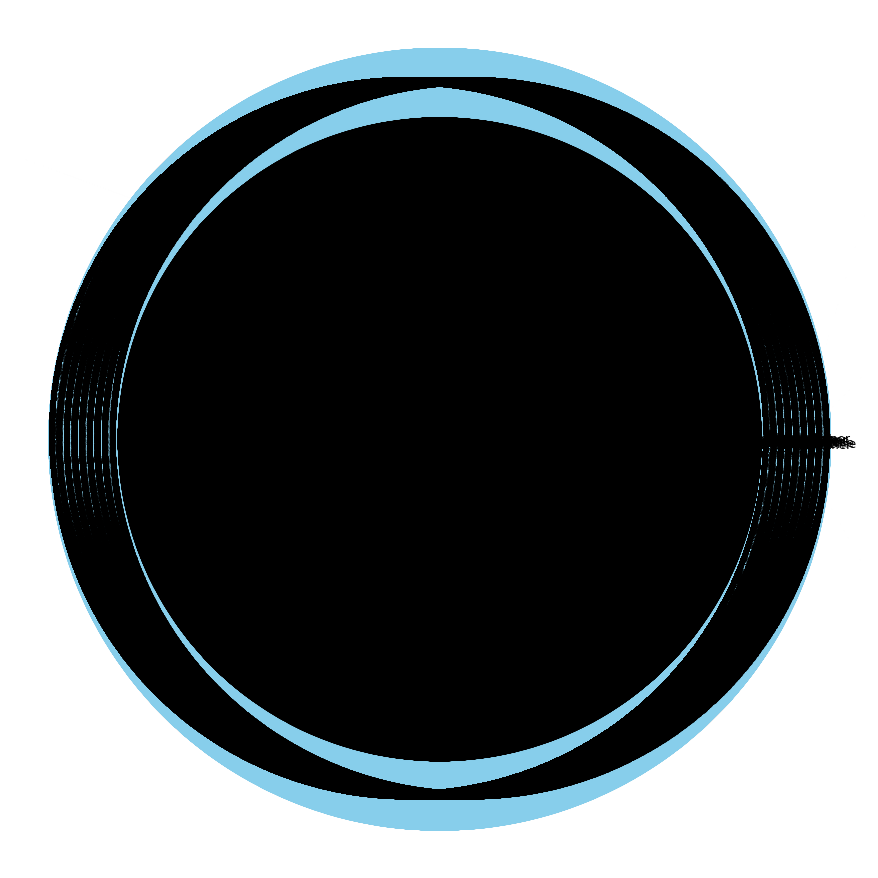

In [113]:
plt.figure(figsize=(12,12))
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, node_size = 4500)
plt.show()

In [115]:
nx.write_edgelist(G,'churn_graph.csv', data=False)
nx.write_edgelist(G,'churn_graph.gexf', data=False)
